In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Defina local do arquivo e faz a leitura da base
path = r"C:\Users\mrthu\OneDrive\Study\Python-Data-Science\Databases\Pokemon\Pokemon.csv"
df = pd.read_csv(path)

In [3]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [66]:
# Drop table index, pandas already have it
df.drop('#',axis=1,inplace=True)

Basic Information

In [6]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [30]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
# Create legendary only DF 
df_legendary = df.loc[df['Legendary']==True]
df_legendary

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [74]:
# Create mean function
def med (frame,grupo,coluna):
    # Calcule a média da coluna desejada para cada tipo em GRUPO
    media_HP_por_tipo = frame.groupby(grupo)[coluna].mean().reset_index()
    
    # Adicione uma coluna com a quantidade de vezes que cada tipo se repete
    media_HP_por_tipo['qty'] = frame[grupo].value_counts().values

    # Ordene os resultados
    # media_HP_por_tipo.sort_values(by=coluna, inplace=True)
    # Reseta Index
    media_HP_por_tipo.reset_index(drop=True, inplace=True)
    
    return media_HP_por_tipo


Pokemon distribution

In [25]:
pok_count = df['Type 1'].value_counts()

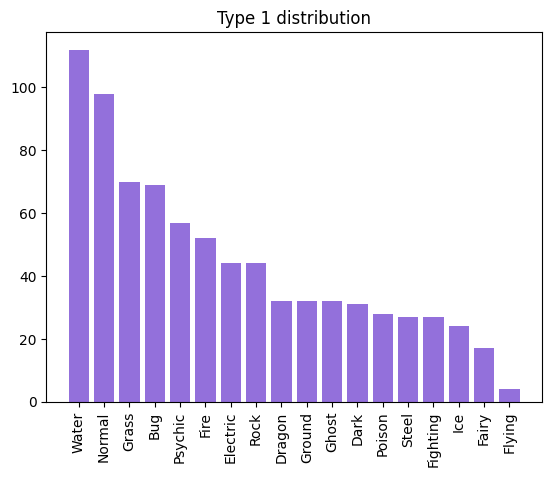

In [26]:
fig, ax = plt.subplots()
ax.bar(pok_count.index,pok_count, color='mediumpurple')
ax.set_title('Type 1 distribution')
plt.xticks(rotation=90)
plt.show()


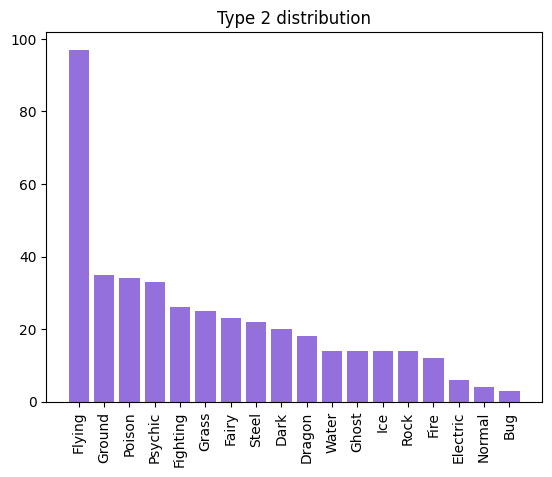

In [29]:
pok_count2 = df['Type 2'].value_counts()
fig, ax = plt.subplots()
ax.bar(pok_count2.index,pok_count2, color='mediumpurple')
ax.set_title('Type 2 distribution')
plt.xticks(rotation=90)
plt.show()

STATS COMPARISON TYPE 1

In [75]:
med(df,'Type 1', 'Total')

,Type 1,Total,qty
0,Bug,378.927536,112
1,Dark,445.741935,98
2,Dragon,550.531250,70
3,Electric,443.409091,69
4,Fairy,413.176471,57
5,Fighting,416.444444,52
6,Fire,458.076923,44
7,Flying,485.000000,44
8,Ghost,439.562500,32
9,Grass,421.142857,32


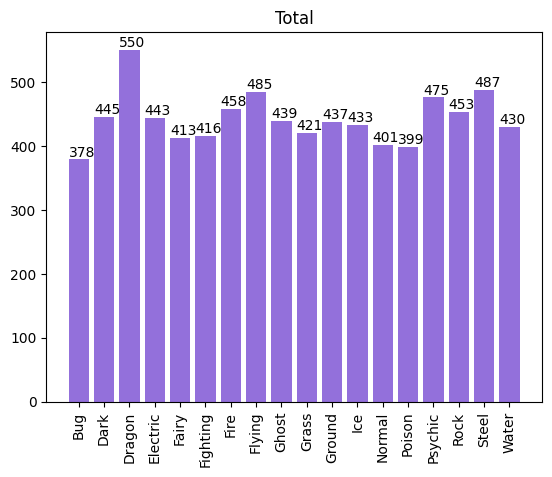

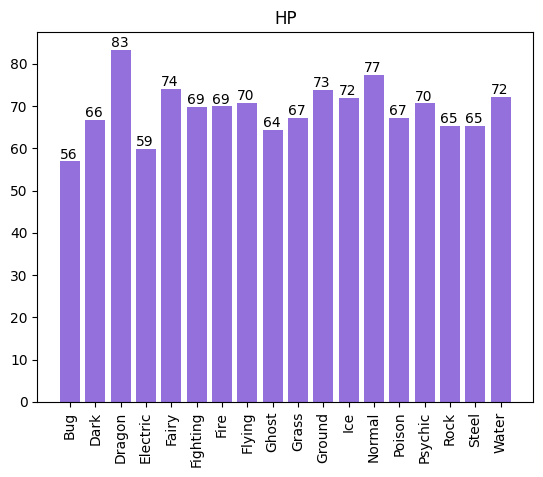

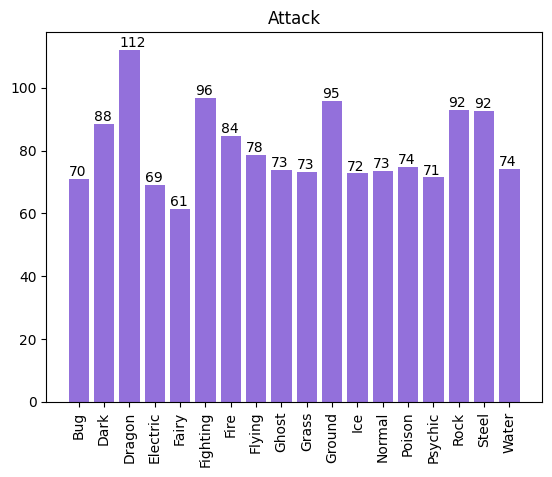

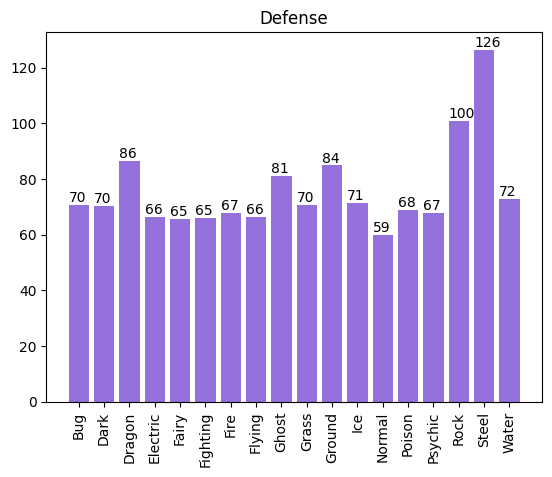

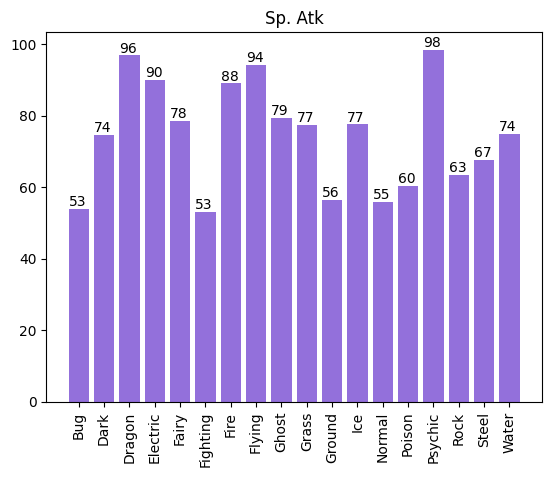

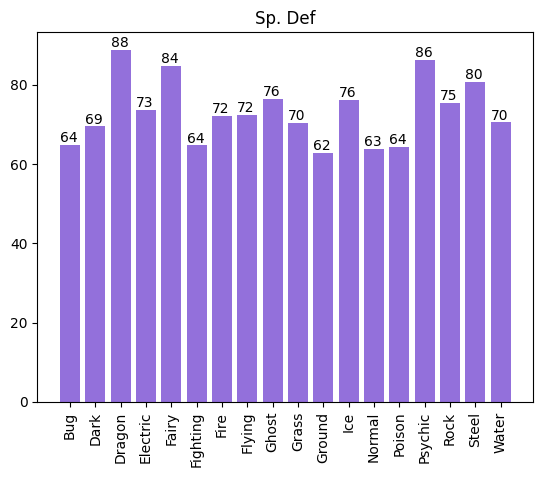

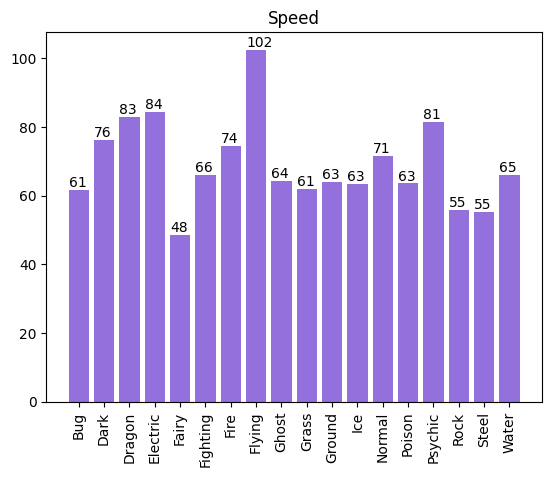

In [76]:
# List to set columns to run over
cols =  ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']

# Plot charts for each stats
for col in cols:
    table =  med(df,'Type 1', col)
    
    fig, ax = plt.subplots()
    bars = ax.bar(table['Type 1'], table[col],color='mediumpurple')
    ax.set_title(col)

    for bar in bars:
        yval = bar.get_height()
        xval = bar.get_x()
        plt.text(xval, yval, int(yval), va='bottom') # va: vertical alignment

    plt.xticks(rotation=90)
    plt.show()


Gen1 analysis 

In [67]:
# 1 gen pokemons, excluded Mega
gen1_df = df


In [68]:
gen1_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [69]:
# Split 
gen1_df['Mega'] = gen1_df['Name'].str.contains('Mega')
gen1_df = df.loc[(df['Generation']==1) & (~gen1_df['Mega']==True)]

gen1_df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,False
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,False


In [71]:
# Group by 
gen1_mean = gen1_df.groupby('Type 1')[['Total','Speed','Attack','Defense','HP']].mean()

In [72]:
gen1_mean['Count'] = gen1_df.groupby('Type 1').size()
gen1_mean

,Total,Speed,Attack,Defense,HP,Count
Type 1,,,,,,
Bug,336.250000,57.083333,63.750000,57.083333,55.416667,12
Dragon,440.000000,66.666667,94.000000,68.333333,64.333333,3
Electric,444.444444,98.888889,62.000000,64.666667,54.444444,9
Fairy,403.000000,47.500000,57.500000,60.500000,82.500000,2
Fighting,412.142857,66.142857,102.857143,61.000000,63.571429,7
Fire,455.583333,84.000000,83.916667,62.583333,63.833333,12
Ghost,405.000000,95.000000,50.000000,45.000000,45.000000,3
Grass,409.416667,52.083333,70.666667,69.583333,65.000000,12
Ground,374.375000,58.125000,81.875000,86.250000,58.125000,8


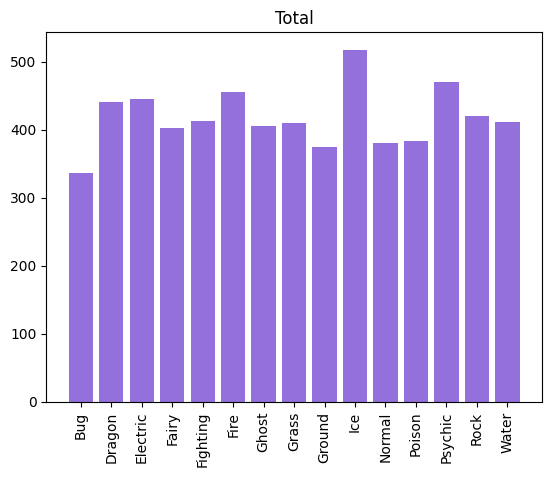

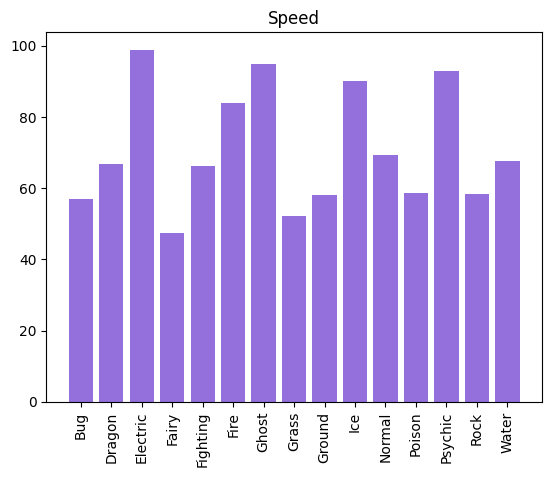

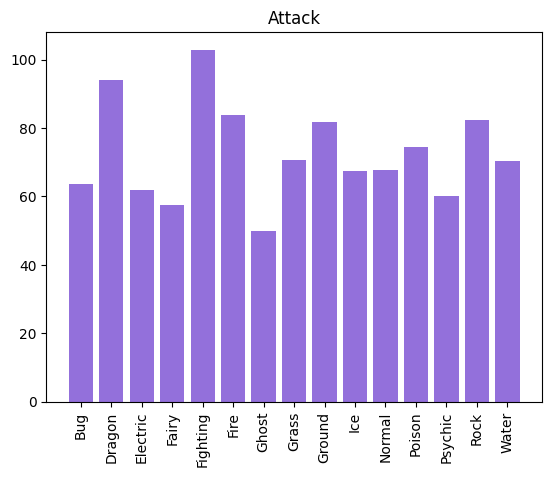

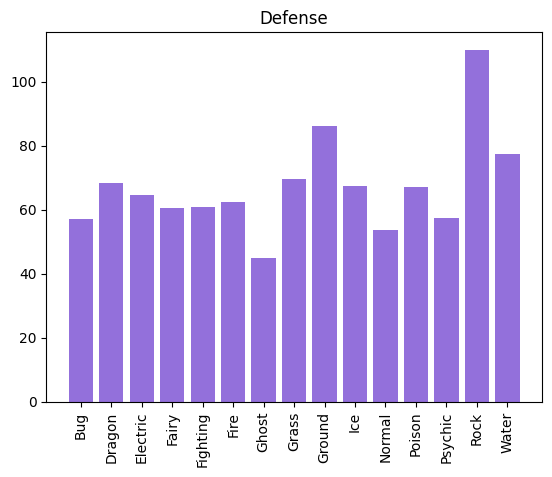

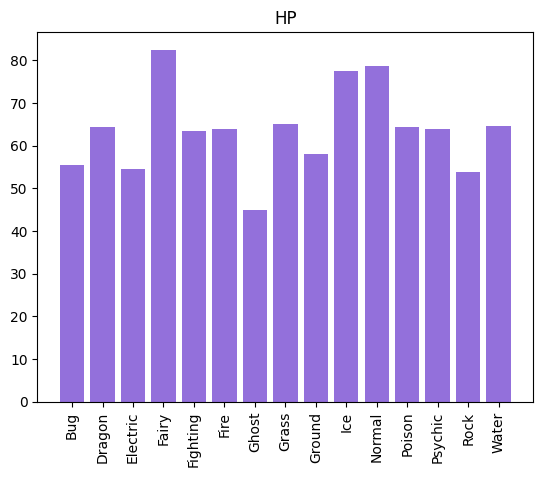

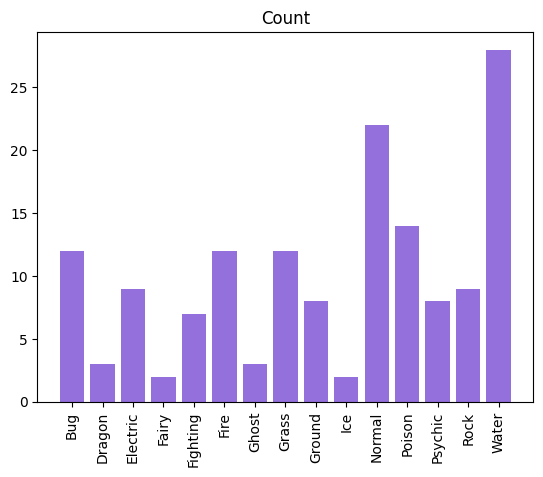

In [77]:
# 
for coluna in gen1_mean.columns:
    plt.bar(gen1_mean.index,gen1_mean[coluna], color='mediumpurple')
    plt.title(coluna)
    plt.xticks(rotation=90)
    plt.show()